<h3 style="text-align: center">Modelo ML utilizando  Dataset de alquiler de bicicletas en Washington</h3>
<h4>Hecho Por:

      -  Santiago Fernández Seoane

      -  Alejandro Regueiro Ruiz

      -  Pablo López Martínez

      -  Adriana Rodríguez Rey
</h4>



<h3 style="text-align: center">Regresión lineal utilizando  Dataset de alquiler de bicicletas en Washington</h3>


<p>Importación de las librerías:</p>

- Las primeras librerías son las fundamentales para el cálculo, visualización, manipulación y análisis de datos.
- La librería *sklearn* es clave para el aprendizaje automático. Incluimos submódulos que nos permiten usar:
    * El módulo clásico de regresión lineal. 
    * Métricas de evaluación.
    * División de datos en conjunto de entrenamiento y prueba.
    * Regresión lineal con regularización.
- *seaborn* es utilizada para la visualización con gráficos.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import kagglehub
import pandas as pd
import seaborn as sns

### Si tenemos el dataset descargado lo ejecutaremos con la primera celda, de lo contrario usamos el import de kaggle para descargarlo directamente

In [14]:
#path = 'dataset/1'

In [15]:
# Descargamos el dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\santiago.fernandezse\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


### Leemos el dataset

In [16]:
dfTelco = pd.read_csv(f'{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dfTelco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
# usando columnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separamos las columnas numericas de las categoricas
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [
    'customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]
binary_features = [
     'Partner', 'Dependents', 'PaperlessBilling', 'Churn'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bin', LabelEncoder(), binary_features)
    ])


# pasaremos a Label encoder las columnas que son Yes o No, que son gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn
#le = LabelEncoder()
# Es
#for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
#    dfTelco[column] = le.fit_transform(dfTelco[column])

#ohenc = OneHotEncoder()

#for column in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']:
#    dfTelco[column] = ohenc.fit_transform(dfTelco[[column]]).toarray()

#Pasar a float64 la columna TotalCharges
dfTelco['TotalCharges'] = pd.to_numeric(dfTelco['TotalCharges'], errors='coerce')
# Convertimos valores NaN de TotalCHarges a 0, ya que son personas que no han pagado nada todavia
dfTelco['TotalCharges'] = dfTelco['TotalCharges'].fillna(0)
# Normalizamos el valor tenure a un rango de 0 a 1
dfTelco['tenure'] = dfTelco['tenure'] / dfTelco['tenure'].max()
#Eliminamos la columna customerID
dfTelco = dfTelco.drop("customerID",axis=1)

dfTelco = preprocessor.fit_transform(dfTelco)


ValueError: could not convert string to float: ' '

### Miramos los tipos de datos y la cantidad de datos con las que trabajaremos

In [506]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   float64


Definimos *x* (características).  
Definimos *y* (etiquetas).  
  
Dividimos los datos de entrenamiento (85%) y prueba (15%).

In [507]:
X = dfTelco[['gender', 'Partner','SeniorCitizen', 'Dependents', 'PhoneService', 'tenure', 'PaperlessBilling','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']].values
y = dfTelco["Churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42, stratify=y)

Creamos y entrenamos el modelo de regresión lineal usando los datos de entrenamiento *x_train* e *y_train*.
Predecimos el valor el *cnt*(cantidad total de usuarios) basandonos en el conjunto de prueba *x_test* y lo guardamos.

Evaluamos el rendiemiento del modelo calculando el Error Cuadrático:
* **Error Cuadrático Medio (MSE)**. Cuánto se desvían las predicciones de los valores reales.
* **Raíz del Error Cuadrático Medio (RMSE)**.
* **Coeficiente de determinación $R^2$**. Porcentaje de variabilidad de *y* explicada por *x*.


Nos fijamos en el RMSE, el cual nos dará la aproximación más exacta de el error medio.

In [508]:
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

best_params_grid = grid_search.best_params_
print(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")


Mejores hiperparámetros (GridSearchCV): {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 27, 'p': 1, 'weights': 'distance'}


In [509]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros de RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (RandomizedSearchCV): {best_params_random}")


Mejores hiperparámetros (RandomizedSearchCV): {'weights': 'uniform', 'p': 2, 'n_neighbors': 25, 'leaf_size': 30, 'algorithm': 'auto'}


In [515]:
#calculamos el valor de k segun la raíz de longitud de las filas
k = int(np.sqrt(len(X_train)))  # da 0.78 
knn = KNeighborsClassifier(n_neighbors= 27)    #así indico el número de vecinos que voy a utilizar

#knn = KNeighborsClassifier(**best_params_random)    #así indico el número de vecinos que voy a utilizar
knn.fit(X_train, y_train)  
knn.score(X_test, y_test)  #precisión del modelo 


SyntaxError: invalid syntax (3277698742.py, line 3)

In [487]:
#utilizo los datos que ya tenía para pruebas
y_pred = knn.predict(X_test)

#podemos también usar predict_proba para tener las probabilidades de clase
probabilidades = knn.predict_proba(X_test)
print(probabilidades[:10]) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Error Cuadrático Medio:", mse)
print ("Raíz del Error Cuadrático Medio:", rmse)
print ("Coeficiente de determinación R2:", r2)

[[0.85185185 0.14814815]
 [0.92592593 0.07407407]
 [0.62962963 0.37037037]
 [0.85185185 0.14814815]
 [0.74074074 0.25925926]
 [0.62962963 0.37037037]
 [0.96296296 0.03703704]
 [0.62962963 0.37037037]
 [0.74074074 0.25925926]
 [0.92592593 0.07407407]]
Error Cuadrático Medio: 0.20709219858156028
Raíz del Error Cuadrático Medio: 0.4550738386037592
Coeficiente de determinación R2: -0.06260194495488625


In [488]:
# haz unn df con la real y la predicciones
df = pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})

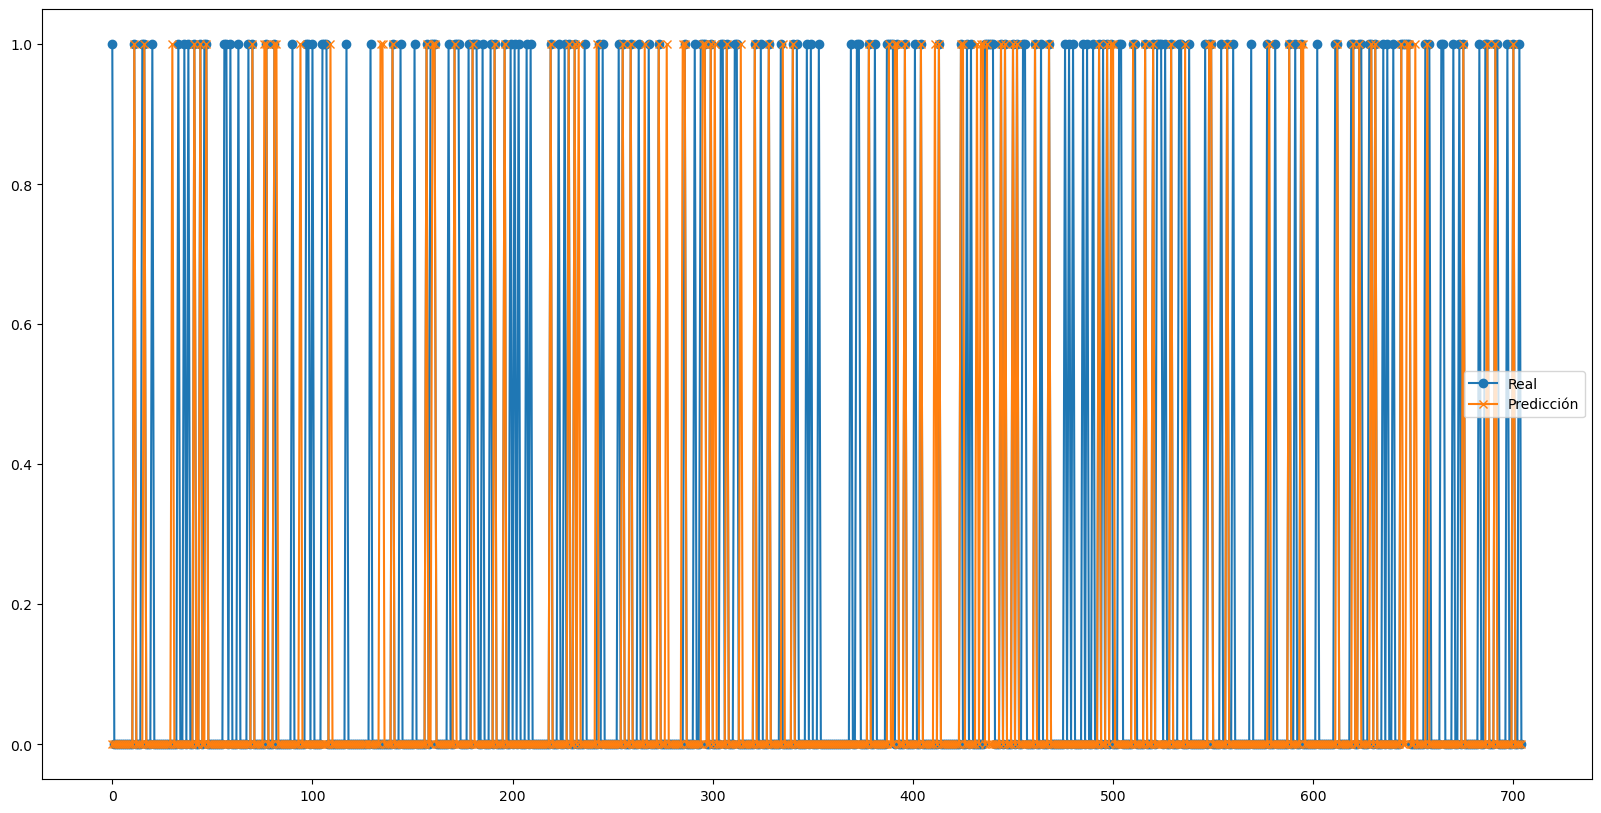

In [489]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Real'], label='Real', marker='o')
plt.plot(df.index, df['Prediccion'], label='Predicción', marker='x')
plt.legend()
plt.show()

In [490]:
#Y así puedo evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del clasificador k-NN con todas las clases: {accuracy:.2f}')

Precisión del clasificador k-NN con todas las clases: 0.79


In [491]:
# Crear vecinos
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 0.9970022088987062, np.int64(2): 0.8624171662985168, np.int64(3): 0.8614704954244241, np.int64(4): 0.8340170400757336, np.int64(5): 0.8294414641842852, np.int64(6): 0.8196591984853266, np.int64(7): 0.8202903124013885, np.int64(8): 0.8174502997791101, np.int64(9): 0.8155569580309245, np.int64(10): 0.8111391606184917, np.int64(11): 0.8131902808456927, np.int64(12): 0.8125591669296308} 
 {np.int64(1): 0.7148936170212766, np.int64(2): 0.7588652482269503, np.int64(3): 0.75177304964539, np.int64(4): 0.7702127659574468, np.int64(5): 0.7617021276595745, np.int64(6): 0.774468085106383, np.int64(7): 0.7730496453900709, np.int64(8): 0.775886524822695, np.int64(9): 0.7801418439716312, np.int64(10): 0.7787234042553192, np.int64(11): 0.7801418439716312, np.int64(12): 0.7872340425531915}


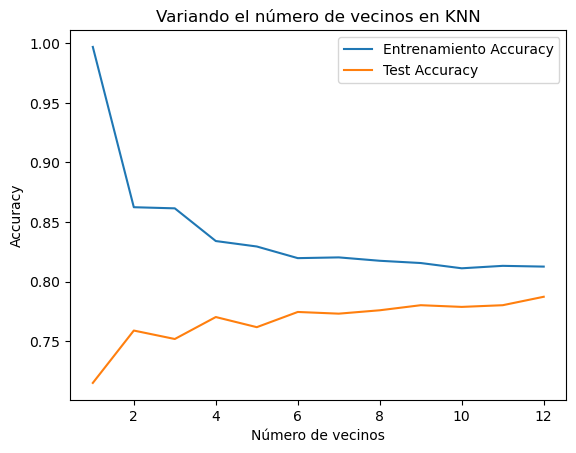

In [492]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [493]:
cm = confusion_matrix(y_test, y_pred)


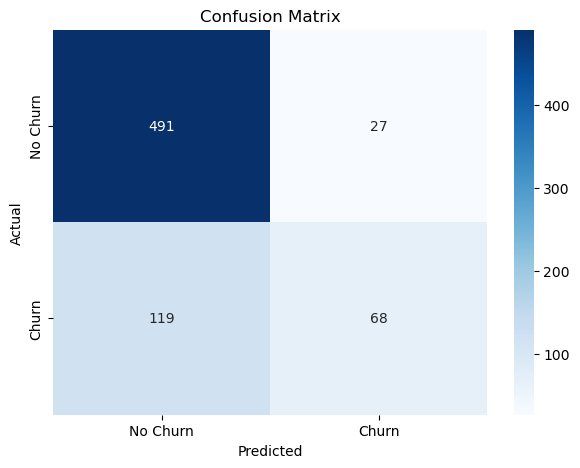

In [494]:
# Create a confusion matrix from the variable cm to calculate the number of correct and incorrect predictions between Churn 0 or 1, i.e., whether the customer left the company or not
# Add below the number if it is TP, FP, TN, FN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()